In [1]:
import numpy as np
import pandas as pd

In [2]:
property_train=pd.read_csv(r"/kaggle/input/property/Property_train.csv")
property_test=pd.read_csv(r"/kaggle/input/property/Property_test.csv")

In [5]:
property_train.head()

,Junk,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,...,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,DAY_issue,MONTH_issue,YEAR_issue
0,0,6LLJ,14674.0,9/7/2010,UT7W,8270,CAT3,B,missing,13143.0,...,GREEN,MD,42077,2008,A,2,10692.0,7,9,2010
1,1,XZ9F,4172.0,1/7/2009,PRN0,3890,CAT2,B,missing,3461.0,...,SILVER,OK,77258,2002,A,7,3615.0,7,1,2009
2,0,QWEV,8210.0,6/23/2010,A9RA,5900,CAT1,B,missing,6922.0,...,SILVER,SC,94514,2004,A,6,5805.0,23,6,2010
3,0,MK2K,7309.0,3/19/2009,RRJQ,7460,OTHER,A,missing,6300.0,...,WHITE,NC,82302,2002,C,7,6444.0,19,3,2009
4,0,GK4G,9182.0,3/3/2010,HE5A,6400,OTHER,B,missing,8330.0,...,SILVER,SC,49176,2007,B,3,6286.0,3,3,2010


In [6]:
property_test.head()

,InteriorsStyle,PriceIndex8,ListDate,Material,PriceIndex9,Agency,AreaIncomeType,EnvRating,PriceIndex7,ExpeditedListing,...,Facade,State,NormalisedPopulation,BuildYear,RegionType,PropertyAge,PriceIndex2,DAY_issue,MONTH_issue,YEAR_issue
0,6LLJ,10645.0,9/22/2010,ZCI3,6015,CAT3,A,missing,9568.0,0,...,BLUE,NC,67549,2006,A,4,8311.0,22,9,2010
1,QD0H,9891.0,3/12/2010,RRJQ,7625,OTHER,A,missing,8888.0,0,...,BLUE,FL,56570,2004,B,6,7123.0,12,3,2010
2,I7GR,8426.0,10/12/2009,ZCI3,6900,CAT2,B,missing,7911.0,0,...,BLACK,OK,51840,2008,A,1,7994.0,12,10,2009
3,5KS5,9269.0,5/20/2010,PRN0,6475,CAT1,B,missing,7773.0,0,...,GREEN,CO,83300,2005,A,5,5259.0,20,5,2010
4,918O,5366.0,1/13/2009,C8A4,3960,CAT1,A,missing,4134.0,0,...,BLACK,NC,95035,2003,A,6,4362.0,13,1,2009


In [3]:
import datetime
def extract_date(data):
    date = data['ListDate']
    d=[]
    m=[]
    y=[]
    for day in date:
        dt =pd.to_datetime(datetime.datetime.strptime(day, "%m/%d/%Y"))
        d.append(dt.day)
        m.append(dt.month)
        y.append(dt.year)
    new_date=pd.DataFrame(np.column_stack([d, m, y]),columns=['DAY_issue','MONTH_issue','YEAR_issue'])
    return new_date

In [4]:
property_train=pd.concat([property_train,extract_date(property_train)],axis=1)
property_test=pd.concat([property_test,extract_date(property_test)],axis=1)

In [12]:
# Handning Cyclic data - Date

def code_cyclic_features(data,columns,drop_cols=True):
    for col in columns:
        max_val=max(data[col])

        data[col+'_sin']=np.sin(2*np.pi*data[col]/max_val)
        data[col+'_cos']=np.cos(2*np.pi*data[col]/max_val)

        if drop_cols:
            del data[col]
    return data  

In [13]:
code_cyclic_features(property_train,['DAY_issue','MONTH_issue','YEAR_issue'])
code_cyclic_features(property_test,['DAY_issue','MONTH_issue','YEAR_issue'])

,InteriorsStyle,PriceIndex8,Material,PriceIndex9,Agency,AreaIncomeType,PriceIndex7,ExpeditedListing,PriceIndex4,PriceIndex1,...,BuildYear,RegionType,PropertyAge,PriceIndex2,DAY_issue_sin,DAY_issue_cos,MONTH_issue_sin,MONTH_issue_cos,YEAR_issue_sin,YEAR_issue_cos
0,6LLJ,10645.0,ZCI3,6015,CAT3,A,9568.0,0,12432.0,6986.0,...,2006,A,4,8311.0,-0.968077,-0.250653,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.000000
1,QD0H,9891.0,RRJQ,7625,OTHER,A,8888.0,0,12173.0,5954.0,...,2004,B,6,7123.0,0.651372,-0.758758,1.000000e+00,6.123234e-17,-2.449294e-16,1.000000
2,I7GR,8426.0,ZCI3,6900,CAT2,B,7911.0,0,9134.0,7407.0,...,2008,A,1,7994.0,0.651372,-0.758758,-8.660254e-01,5.000000e-01,-3.125958e-03,0.999995
3,5KS5,9269.0,PRN0,6475,CAT1,B,7773.0,0,8500.0,4241.0,...,2005,A,5,5259.0,-0.790776,-0.612106,5.000000e-01,-8.660254e-01,-2.449294e-16,1.000000
4,918O,5366.0,C8A4,3960,CAT1,A,4134.0,0,5211.0,3352.0,...,2003,A,6,4362.0,0.485302,-0.874347,5.000000e-01,8.660254e-01,-3.125958e-03,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10943,DYK9,13956.0,PRN0,7500,CAT2,B,12860.0,0,10415.0,8497.0,...,2008,A,1,9181.0,-0.848644,0.528964,-8.660254e-01,5.000000e-01,-3.125958e-03,0.999995
10944,GK4G,7880.0,HE5A,5425,OTHER,B,6845.0,0,8521.0,3739.0,...,2006,B,4,5185.0,-0.571268,0.820763,-1.000000e+00,-1.836970e-16,-2.449294e-16,1.000000
10945,6LLJ,16417.0,2NHM,7700,CAT3,A,14663.0,0,13555.0,10199.0,...,2007,A,2,12088.0,-0.485302,-0.874347,-5.000000e-01,8.660254e-01,-3.125958e-03,0.999995
10946,2XWO,11311.0,NYFD,6300,CAT2,A,10292.0,0,11733.0,6735.0,...,2007,A,3,7978.0,0.937752,0.347305,-2.449294e-16,1.000000e+00,-2.449294e-16,1.000000


[]

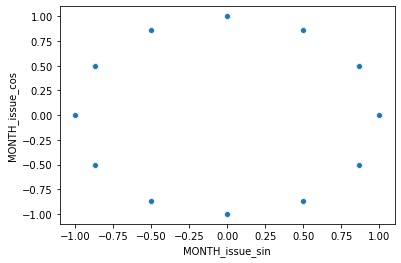

In [15]:
import seaborn as sns
sns.scatterplot(property_train['MONTH_issue_sin'],property_train['MONTH_issue_cos']).plot()

[]

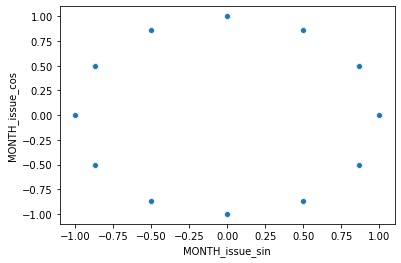

In [16]:
sns.scatterplot(property_test['MONTH_issue_sin'],property_test['MONTH_issue_cos']).plot()

In [7]:
for col in property_train.columns:
    pd.to_numeric(property_train[col], errors='coerce')

In [8]:
for col in property_test.columns:
    pd.to_numeric(property_test[col], errors='coerce')

In [ ]:
property_train.columns

In [17]:
print(property_train.shape,property_test.shape)

(62035, 33) (10948, 32)


In [9]:
property_train=property_train.replace('missing', np.nan)
property_test=property_test.replace('missing', np.nan)

In [18]:
percent_missing = property_train.isnull().sum() * 100 / len(property_train)
print(percent_missing)

Junk                     0.000000
InteriorsStyle           0.000000
PriceIndex8              0.438462
Material                 0.000000
PriceIndex9              0.000000
Agency                   0.008060
AreaIncomeType           4.313694
PriceIndex7              0.438462
ExpeditedListing         0.000000
PriceIndex4              0.022568
PriceIndex1              0.022568
PriceIndex6              0.438462
Channel                  0.000000
InsurancePremiumIndex    0.000000
PlotType                 0.000000
Architecture             0.000000
PriceIndex3              0.022568
Region                   0.009672
PriceIndex5              0.438462
SubModel                 0.000000
Facade                   0.008060
State                    0.000000
NormalisedPopulation     0.000000
BuildYear                0.000000
RegionType               0.008060
PropertyAge              0.000000
PriceIndex2              0.022568
DAY_issue_sin            0.000000
DAY_issue_cos            0.000000
MONTH_issue_si

In [7]:
percent_missing = property_test.isnull().sum() * 100 / len(property_test)
print(percent_missing)

InteriorsStyle            0.000000
PriceIndex8               0.392766
ListDate                  0.000000
Material                  0.000000
PriceIndex9               0.000000
Agency                    0.000000
AreaIncomeType            4.548776
EnvRating                95.652174
PriceIndex7               0.392766
ExpeditedListing          0.000000
PriceIndex4               0.036536
PriceIndex1               0.036536
PriceIndex6               0.392766
PRIMEUNIT                95.652174
Channel                   0.000000
Zip                       0.000000
InsurancePremiumIndex     0.000000
PlotType                  0.000000
Architecture              0.000000
PriceIndex3               0.036536
Region                    0.027402
PriceIndex5               0.392766
SubModel                  0.000000
Facade                    0.027402
State                     0.000000
NormalisedPopulation      0.000000
BuildYear                 0.000000
RegionType                0.000000
PropertyAge         

In [10]:
for col in['EnvRating','PRIMEUNIT','ListDate','Zip']:
    property_train.drop([col],1,inplace=True)
    property_test.drop([col],1,inplace=True)

In [29]:
c=property_train.columns[property_train.isna().any()].tolist()
c

['PriceIndex8',
 'Agency',
 'AreaIncomeType',
 'PriceIndex7',
 'PriceIndex4',
 'PriceIndex1',
 'PriceIndex6',
 'PriceIndex3',
 'Region',
 'PriceIndex5',
 'Facade',
 'RegionType',
 'PriceIndex2']

In [23]:
for col in ['PriceIndex1','PriceIndex2','PriceIndex3','PriceIndex4','PriceIndex5','PriceIndex6','PriceIndex7','PriceIndex8','PriceIndex9']:
    property_train[col]=property_train[col].astype(float)
    property_test[col]=property_test[col].astype(float)

In [19]:
property_train = property_train.fillna(0)
property_test = property_test.fillna(0)

In [46]:
property_train.isnull().sum()

Junk                     2014
PriceIndex8              2014
PriceIndex9              2014
Agency                   2014
AreaIncomeType           2014
PriceIndex7              2014
ExpeditedListing         2014
PriceIndex4              2014
PriceIndex1              2014
PriceIndex6              2014
Channel                  2014
InsurancePremiumIndex    2014
PriceIndex3              2014
Region                   2014
PriceIndex5              2014
NormalisedPopulation     2014
BuildYear                2014
RegionType               2014
PropertyAge              2014
PriceIndex2              2014
DAY_issue_sin            2014
DAY_issue_cos            2014
MONTH_issue_sin          2014
MONTH_issue_cos          2014
YEAR_issue_sin           2014
YEAR_issue_cos           2014
InteriorsStyle1          2014
InteriorsStyle2          2014
InteriorsStyle3          2014
Material1                  81
Material2                  81
Material3                  81
PlotType1                   2
PlotType2 

In [21]:
property_test.isnull().sum()

InteriorsStyle           0
PriceIndex8              0
Material                 0
PriceIndex9              0
Agency                   0
AreaIncomeType           0
PriceIndex7              0
ExpeditedListing         0
PriceIndex4              0
PriceIndex1              0
PriceIndex6              0
Channel                  0
InsurancePremiumIndex    0
PlotType                 0
Architecture             0
PriceIndex3              0
Region                   0
PriceIndex5              0
SubModel                 0
Facade                   0
State                    0
NormalisedPopulation     0
BuildYear                0
RegionType               0
PropertyAge              0
PriceIndex2              0
DAY_issue_sin            0
DAY_issue_cos            0
MONTH_issue_sin          0
MONTH_issue_cos          0
YEAR_issue_sin           0
YEAR_issue_cos           0
dtype: int64

In [19]:
property_train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9              float64
Agency                    object
AreaIncomeType            object
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
Channel                   object
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3              float64
Region                    object
PriceIndex5              float64
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2              float64
dtype: object

In [20]:
property_train.dtypes

Junk                       int64
InteriorsStyle            object
PriceIndex8              float64
Material                  object
PriceIndex9              float64
Agency                    object
AreaIncomeType            object
PriceIndex7              float64
ExpeditedListing           int64
PriceIndex4              float64
PriceIndex1              float64
PriceIndex6              float64
Channel                   object
InsurancePremiumIndex      int64
PlotType                  object
Architecture              object
PriceIndex3              float64
Region                    object
PriceIndex5              float64
SubModel                  object
Facade                    object
State                     object
NormalisedPopulation       int64
BuildYear                  int64
RegionType                object
PropertyAge                int64
PriceIndex2              float64
dtype: object

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(property_train.corr())

In [ ]:
sns.heatmap(property_test.corr())

In [ ]:
# Handling Outlires

In [ ]:
data_plot = property_train.loc[:,["PriceIndex1","Junk"]]
data_plot.plot()

In [ ]:
data_plot = property_train.loc[:,["PriceIndex2","Junk"]]
data_plot.plot()

In [ ]:
sns.boxplot(x=property_train['PriceIndex1'])  

In [24]:
min_thresold, max_thresold = property_train.PriceIndex1.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex1<max_thresold) & (property_train.PriceIndex1>min_thresold)]
property_train.shape

(61247, 33)

In [ ]:
sns.boxplot(x=property_train['PriceIndex2'])  

In [25]:
min_thresold, max_thresold = property_train.PriceIndex2.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex2<max_thresold) & (property_train.PriceIndex2>min_thresold)]
property_train.shape

(61122, 33)

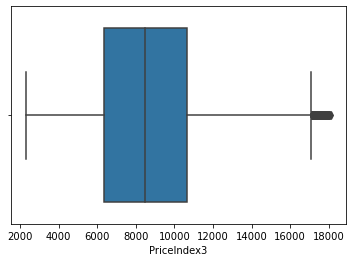

In [28]:
sns.boxplot(x=property_train['PriceIndex3'])  

In [27]:
min_thresold, max_thresold = property_train.PriceIndex3.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex3<max_thresold) & (property_train.PriceIndex3>min_thresold)]
property_train.shape

(60995, 33)

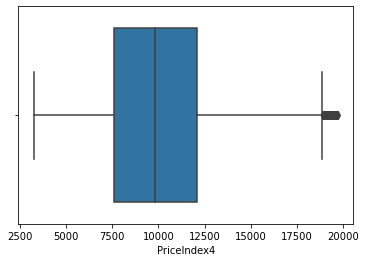

In [31]:
sns.boxplot(x=property_train['PriceIndex4'])  

In [30]:
min_thresold, max_thresold = property_train.PriceIndex4.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex4<max_thresold) & (property_train.PriceIndex4>min_thresold)]
property_train.shape

(60873, 33)

In [ ]:
sns.boxplot(x=property_train['PriceIndex5'])  

In [32]:
min_thresold, max_thresold = property_train.PriceIndex5.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex5<max_thresold) & (property_train.PriceIndex5>min_thresold)]
property_train.shape

(60518, 33)

In [ ]:
sns.boxplot(x=property_train['PriceIndex6'])  

In [33]:
min_thresold, max_thresold = property_train.PriceIndex6.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex6<max_thresold) & (property_train.PriceIndex6>min_thresold)]
property_train.shape

(60396, 33)

In [ ]:
sns.boxplot(x=property_train['PriceIndex7'])  

In [34]:
min_thresold, max_thresold = property_train.PriceIndex7.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex7<max_thresold) & (property_train.PriceIndex7>min_thresold)]
property_train.shape

(60274, 33)

In [ ]:
sns.boxplot(x=property_train['PriceIndex8'])  

In [35]:
min_thresold, max_thresold = property_train.PriceIndex8.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex8<max_thresold) & (property_train.PriceIndex8>min_thresold)]
property_train.shape

(60150, 33)

In [ ]:
sns.boxplot(x=property_train['PriceIndex9'])  

In [36]:
min_thresold, max_thresold = property_train.PriceIndex9.quantile([0.001, 0.999])
min_thresold, max_thresold

property_train = property_train[(property_train.PriceIndex9<max_thresold) & (property_train.PriceIndex9>min_thresold)]
property_train.shape

(60021, 33)

In [ ]:
property_train.shape

In [ ]:
property_train.dtypes

In [30]:
for col in property_train.select_dtypes(['object']).columns:
    print(col,':',property_train[col].nunique())

InteriorsStyle : 967
Material : 129
Agency : 5
AreaIncomeType : 4
Channel : 3
PlotType : 13
Architecture : 31
Region : 3
SubModel : 766
Facade : 17
State : 37
RegionType : 5


In [31]:
for col in property_test.select_dtypes(['object']).columns:
    print(col,':',property_test[col].nunique())

InteriorsStyle : 715
Material : 112
Agency : 4
AreaIncomeType : 4
Channel : 3
PlotType : 12
Architecture : 30
Region : 3
SubModel : 542
Facade : 17
State : 37
RegionType : 4


In [37]:
from keras.models import Model,Sequential
from keras.layers import Dense,Input

In [38]:
for col in property_train.columns:
        if property_train[col].dtype==object:
            if property_train[col].value_counts().count()>10:
                #print (col,':',hs_train[col].value_counts().count())

                dummy_data=pd.get_dummies(property_train[col],prefix=col)
                dummy_data.shape[1]

                y=pd.get_dummies(property_train[col],prefix=col)

                embedding_dim=3
                inputs=Input(shape=(dummy_data.shape[1],))
                dense1=Dense(5,activation='relu')(inputs)
                embedded_output=Dense(embedding_dim)(dense1)
                outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                model=Model(inputs=inputs,outputs=outputs)

                embedder=Model(inputs=inputs,outputs=embedded_output)

                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                model.fit(dummy_data,y,epochs=150,batch_size=100)

                low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                #low_dim.head()

                property_train=pd.concat([property_train,low_dim],axis=1)
                property_train=property_train.drop([col],axis=1)
                print('======================'+col+'- Finished ! ==================================')
                

Epoch 1/150
601/601 [==============================] - 1s 2ms/step - loss: 5.6319 - accuracy: 0.0292
Epoch 2/150
601/601 [==============================] - 1s 2ms/step - loss: 4.9575 - accuracy: 0.0330
Epoch 3/150
601/601 [==============================] - 1s 2ms/step - loss: 4.6162 - accuracy: 0.0390
Epoch 4/150
601/601 [==============================] - 1s 2ms/step - loss: 4.0353 - accuracy: 0.0941
Epoch 5/150
601/601 [==============================] - 1s 2ms/step - loss: 3.5152 - accuracy: 0.1636
Epoch 6/150
601/601 [==============================] - 1s 2ms/step - loss: 2.9318 - accuracy: 0.3086
Epoch 7/150
601/601 [==============================] - 1s 2ms/step - loss: 2.4847 - accuracy: 0.4167
Epoch 8/150
601/601 [==============================] - 1s 2ms/step - loss: 2.1685 - accuracy: 0.4838
Epoch 9/150
601/601 [==============================] - 1s 2ms/step - loss: 1.9107 - accuracy: 0.5615
Epoch 10/150
601/601 [==============================] - 1s 2ms/step - loss: 1.6944 - accura

601/601 [==============================] - 1s 2ms/step - loss: 0.0849 - accuracy: 0.9819
Epoch 82/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9825
Epoch 83/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9832
Epoch 84/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0807 - accuracy: 0.9834
Epoch 85/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0793 - accuracy: 0.9834
Epoch 86/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9843
Epoch 87/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0773 - accuracy: 0.9839
Epoch 88/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9846
Epoch 89/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9845
Epoch 90/150
601/601 [==============================] - 1s 2ms/step - loss: 0.0760 - accuracy: 

620/620 [==============================] - 1s 1ms/step - loss: 0.1008 - accuracy: 0.9450
Epoch 11/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1350 - accuracy: 0.9442
Epoch 12/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1650 - accuracy: 0.9420
Epoch 13/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1414 - accuracy: 0.9419
Epoch 14/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1320 - accuracy: 0.9423
Epoch 15/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1197 - accuracy: 0.9435
Epoch 16/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1140 - accuracy: 0.9442
Epoch 17/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1104 - accuracy: 0.9445
Epoch 18/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1083 - accuracy: 0.9445
Epoch 19/150
620/620 [==============================] - 1s 1ms/step - loss: 0.1053 - accuracy: 

620/620 [==============================] - 1s 1ms/step - loss: 2.7430 - accuracy: 0.8344
Epoch 91/150
620/620 [==============================] - 1s 1ms/step - loss: 2.9781 - accuracy: 0.8266
Epoch 92/150
620/620 [==============================] - 1s 1ms/step - loss: 2.6958 - accuracy: 0.8453
Epoch 93/150
620/620 [==============================] - 1s 1ms/step - loss: 3.0628 - accuracy: 0.8282
Epoch 94/150
620/620 [==============================] - 1s 1ms/step - loss: 3.0354 - accuracy: 0.8359
Epoch 95/150
620/620 [==============================] - 1s 1ms/step - loss: 3.0926 - accuracy: 0.8418
Epoch 96/150
620/620 [==============================] - 1s 1ms/step - loss: 3.2304 - accuracy: 0.8177
Epoch 97/150
620/620 [==============================] - 1s 1ms/step - loss: 3.1731 - accuracy: 0.8271
Epoch 98/150
620/620 [==============================] - 1s 1ms/step - loss: 3.9985 - accuracy: 0.8093
Epoch 99/150
620/620 [==============================] - 1s 1ms/step - loss: 3.1260 - accuracy: 

621/621 [==============================] - 1s 858us/step - loss: 0.0141 - accuracy: 0.9672
Epoch 19/150
621/621 [==============================] - 1s 917us/step - loss: 0.0147 - accuracy: 0.9668
Epoch 20/150
621/621 [==============================] - 1s 885us/step - loss: 0.0148 - accuracy: 0.9668
Epoch 21/150
621/621 [==============================] - 1s 890us/step - loss: 0.0151 - accuracy: 0.9667
Epoch 22/150
621/621 [==============================] - 1s 871us/step - loss: 0.0156 - accuracy: 0.9660
Epoch 23/150
621/621 [==============================] - 1s 862us/step - loss: 0.0150 - accuracy: 0.9661
Epoch 24/150
621/621 [==============================] - 1s 865us/step - loss: 0.0155 - accuracy: 0.9658
Epoch 25/150
621/621 [==============================] - 1s 857us/step - loss: 0.0155 - accuracy: 0.9661
Epoch 26/150
621/621 [==============================] - 1s 871us/step - loss: 0.0159 - accuracy: 0.9656
Epoch 27/150
621/621 [==============================] - 1s 853us/step - loss:

621/621 [==============================] - 1s 910us/step - loss: 1.6964 - accuracy: 0.8651
Epoch 97/150
621/621 [==============================] - 1s 859us/step - loss: 0.6988 - accuracy: 0.9130
Epoch 98/150
621/621 [==============================] - 1s 884us/step - loss: 1.3312 - accuracy: 0.8779
Epoch 99/150
621/621 [==============================] - 1s 876us/step - loss: 1.0905 - accuracy: 0.8891
Epoch 100/150
621/621 [==============================] - 1s 928us/step - loss: 1.1958 - accuracy: 0.8935
Epoch 101/150
621/621 [==============================] - 1s 880us/step - loss: 1.5578 - accuracy: 0.8793
Epoch 102/150
621/621 [==============================] - 1s 932us/step - loss: 1.3697 - accuracy: 0.8764
Epoch 103/150
621/621 [==============================] - 1s 904us/step - loss: 1.0452 - accuracy: 0.8957
Epoch 104/150
621/621 [==============================] - 1s 940us/step - loss: 1.5627 - accuracy: 0.8847
Epoch 105/150
621/621 [==============================] - 1s 903us/step -

621/621 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.9647
Epoch 25/150
621/621 [==============================] - 1s 1ms/step - loss: 0.0287 - accuracy: 0.9635
Epoch 26/150
621/621 [==============================] - 1s 986us/step - loss: 0.0344 - accuracy: 0.9631
Epoch 27/150
621/621 [==============================] - 1s 1ms/step - loss: 0.0343 - accuracy: 0.9638
Epoch 28/150
621/621 [==============================] - 1s 987us/step - loss: 0.0337 - accuracy: 0.9638
Epoch 29/150
621/621 [==============================] - 1s 979us/step - loss: 0.0332 - accuracy: 0.9627
Epoch 30/150
621/621 [==============================] - 1s 990us/step - loss: 0.0654 - accuracy: 0.9557
Epoch 31/150
621/621 [==============================] - 1s 1ms/step - loss: 0.0433 - accuracy: 0.9622
Epoch 32/150
621/621 [==============================] - 1s 988us/step - loss: 0.0440 - accuracy: 0.9610
Epoch 33/150
621/621 [==============================] - 1s 994us/step - loss: 0.0461 

621/621 [==============================] - 1s 970us/step - loss: 1.3228 - accuracy: 0.9140
Epoch 104/150
621/621 [==============================] - 1s 1ms/step - loss: 1.7561 - accuracy: 0.8892
Epoch 105/150
621/621 [==============================] - 1s 1ms/step - loss: 1.5832 - accuracy: 0.9019
Epoch 106/150
621/621 [==============================] - 1s 1ms/step - loss: 1.0670 - accuracy: 0.9236
Epoch 107/150
621/621 [==============================] - 1s 1ms/step - loss: 1.9543 - accuracy: 0.8953
Epoch 108/150
621/621 [==============================] - 1s 1ms/step - loss: 2.2746 - accuracy: 0.8793
Epoch 109/150
621/621 [==============================] - 1s 1ms/step - loss: 1.3542 - accuracy: 0.9066
Epoch 110/150
621/621 [==============================] - 1s 1ms/step - loss: 2.7016 - accuracy: 0.8677
Epoch 111/150
621/621 [==============================] - 1s 1ms/step - loss: 1.1548 - accuracy: 0.9122
Epoch 112/150
621/621 [==============================] - 1s 1ms/step - loss: 2.5290 -

621/621 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.8433
Epoch 32/150
621/621 [==============================] - 1s 2ms/step - loss: 0.5981 - accuracy: 0.8392
Epoch 33/150
621/621 [==============================] - 1s 2ms/step - loss: 0.6189 - accuracy: 0.8370
Epoch 34/150
621/621 [==============================] - 1s 2ms/step - loss: 0.6698 - accuracy: 0.8261
Epoch 35/150
621/621 [==============================] - 1s 2ms/step - loss: 0.7056 - accuracy: 0.8231
Epoch 36/150
621/621 [==============================] - 1s 2ms/step - loss: 0.7415 - accuracy: 0.8210
Epoch 37/150
621/621 [==============================] - 1s 2ms/step - loss: 0.8030 - accuracy: 0.8140
Epoch 38/150
621/621 [==============================] - 1s 2ms/step - loss: 0.8639 - accuracy: 0.8079
Epoch 39/150
621/621 [==============================] - 1s 2ms/step - loss: 0.9325 - accuracy: 0.7992
Epoch 40/150
621/621 [==============================] - 2s 2ms/step - loss: 0.9944 - accuracy: 

621/621 [==============================] - 1s 2ms/step - loss: 30.7225 - accuracy: 0.4885
Epoch 112/150
621/621 [==============================] - 1s 2ms/step - loss: 31.8870 - accuracy: 0.4918
Epoch 113/150
621/621 [==============================] - 1s 2ms/step - loss: 33.4109 - accuracy: 0.4821
Epoch 114/150
621/621 [==============================] - 1s 2ms/step - loss: 33.1645 - accuracy: 0.4860
Epoch 115/150
621/621 [==============================] - 1s 2ms/step - loss: 33.8695 - accuracy: 0.4883
Epoch 116/150
621/621 [==============================] - 1s 2ms/step - loss: 34.1229 - accuracy: 0.4859
Epoch 117/150
621/621 [==============================] - 1s 2ms/step - loss: 35.0855 - accuracy: 0.4914
Epoch 118/150
621/621 [==============================] - 1s 2ms/step - loss: 34.8388 - accuracy: 0.4855
Epoch 119/150
621/621 [==============================] - 1s 2ms/step - loss: 37.7557 - accuracy: 0.4705
Epoch 120/150
621/621 [==============================] - 1s 2ms/step - loss: 3

621/621 [==============================] - 1s 1ms/step - loss: 0.0712 - accuracy: 0.9553
Epoch 40/150
621/621 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.9364
Epoch 41/150
621/621 [==============================] - 1s 1ms/step - loss: 0.0682 - accuracy: 0.9557
Epoch 42/150
621/621 [==============================] - 1s 1ms/step - loss: 0.1773 - accuracy: 0.9472
Epoch 43/150
621/621 [==============================] - 1s 1ms/step - loss: 0.1479 - accuracy: 0.9495
Epoch 44/150
621/621 [==============================] - 1s 979us/step - loss: 0.3335 - accuracy: 0.9307
Epoch 45/150
621/621 [==============================] - 1s 965us/step - loss: 0.0840 - accuracy: 0.9536
Epoch 46/150
621/621 [==============================] - 1s 949us/step - loss: 0.2495 - accuracy: 0.9383
Epoch 47/150
621/621 [==============================] - 1s 972us/step - loss: 0.2542 - accuracy: 0.9394
Epoch 48/150
621/621 [==============================] - 1s 971us/step - loss: 0.3402 - 

621/621 [==============================] - 1s 965us/step - loss: 3.9211 - accuracy: 0.8475
Epoch 119/150
621/621 [==============================] - 1s 962us/step - loss: 3.8864 - accuracy: 0.8605
Epoch 120/150
621/621 [==============================] - 1s 984us/step - loss: 4.9218 - accuracy: 0.8314
Epoch 121/150
621/621 [==============================] - 1s 939us/step - loss: 4.1834 - accuracy: 0.8402
Epoch 122/150
621/621 [==============================] - 1s 941us/step - loss: 3.7575 - accuracy: 0.8546
Epoch 123/150
621/621 [==============================] - 1s 948us/step - loss: 4.2718 - accuracy: 0.8446
Epoch 124/150
621/621 [==============================] - 1s 944us/step - loss: 5.1085 - accuracy: 0.8406
Epoch 125/150
621/621 [==============================] - 1s 926us/step - loss: 4.5852 - accuracy: 0.8371
Epoch 126/150
621/621 [==============================] - 1s 945us/step - loss: 4.5205 - accuracy: 0.8473
Epoch 127/150
621/621 [==============================] - 1s 947us/ste

621/621 [==============================] - 1s 982us/step - loss: 0.2093 - accuracy: 0.9368
Epoch 47/150
621/621 [==============================] - 1s 962us/step - loss: 0.0791 - accuracy: 0.9546
Epoch 48/150
621/621 [==============================] - 1s 1ms/step - loss: 0.3079 - accuracy: 0.9316
Epoch 49/150
621/621 [==============================] - 1s 1ms/step - loss: 0.0840 - accuracy: 0.9536
Epoch 50/150
621/621 [==============================] - 1s 968us/step - loss: 0.2525 - accuracy: 0.9342
Epoch 51/150
621/621 [==============================] - 1s 972us/step - loss: 0.1199 - accuracy: 0.9477
Epoch 52/150
621/621 [==============================] - 1s 986us/step - loss: 0.3945 - accuracy: 0.9244
Epoch 53/150
621/621 [==============================] - 1s 985us/step - loss: 0.1516 - accuracy: 0.9464
Epoch 54/150
621/621 [==============================] - 1s 1ms/step - loss: 0.2021 - accuracy: 0.9398
Epoch 55/150
621/621 [==============================] - 1s 1000us/step - loss: 0.36

621/621 [==============================] - 1s 1ms/step - loss: 3.6976 - accuracy: 0.8498
Epoch 126/150
621/621 [==============================] - 1s 975us/step - loss: 4.1349 - accuracy: 0.8417
Epoch 127/150
621/621 [==============================] - 1s 985us/step - loss: 3.9211 - accuracy: 0.8392
Epoch 128/150
621/621 [==============================] - 1s 981us/step - loss: 3.8559 - accuracy: 0.8450
Epoch 129/150
621/621 [==============================] - 1s 981us/step - loss: 4.2730 - accuracy: 0.8363
Epoch 130/150
621/621 [==============================] - 1s 1ms/step - loss: 3.2027 - accuracy: 0.8572
Epoch 131/150
621/621 [==============================] - 1s 989us/step - loss: 4.5389 - accuracy: 0.8359
Epoch 132/150
621/621 [==============================] - 1s 968us/step - loss: 4.6712 - accuracy: 0.8377
Epoch 133/150
621/621 [==============================] - 1s 976us/step - loss: 3.3431 - accuracy: 0.8583
Epoch 134/150
621/621 [==============================] - 1s 1ms/step - lo

In [39]:
property_train.to_csv('Property_train_CE.csv', index=False)

In [40]:
for col in property_test.columns:
        if property_test[col].dtype==object:
            if property_test[col].value_counts().count()>10:
                #print (col,':',hs_train[col].value_counts().count())

                dummy_data=pd.get_dummies(property_test[col],prefix=col)
                dummy_data.shape[1]

                y=pd.get_dummies(property_test[col],prefix=col)

                embedding_dim=3
                inputs=Input(shape=(dummy_data.shape[1],))
                dense1=Dense(5,activation='relu')(inputs)
                embedded_output=Dense(embedding_dim)(dense1)
                outputs=Dense(dummy_data.shape[1],activation='softmax')(embedded_output)
                model=Model(inputs=inputs,outputs=outputs)

                embedder=Model(inputs=inputs,outputs=embedded_output)

                model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
                model.fit(dummy_data,y,epochs=150,batch_size=100)

                low_dim=pd.DataFrame(embedder.predict(dummy_data),columns=[col+'1',col+'2',col+'3'])
                #low_dim.head()

                property_test=pd.concat([property_test,low_dim],axis=1)
                property_test=property_test.drop([col],axis=1)
                print('======================'+col+'- Finished ! ==================================')
                

Epoch 1/150
110/110 [==============================] - 0s 2ms/step - loss: 6.4866 - accuracy: 0.0313
Epoch 2/150
110/110 [==============================] - 0s 2ms/step - loss: 5.9719 - accuracy: 0.0200
Epoch 3/150
110/110 [==============================] - 0s 2ms/step - loss: 5.3714 - accuracy: 0.0229
Epoch 4/150
110/110 [==============================] - 0s 2ms/step - loss: 5.1968 - accuracy: 0.0277
Epoch 5/150
110/110 [==============================] - 0s 2ms/step - loss: 5.0955 - accuracy: 0.0290
Epoch 6/150
110/110 [==============================] - 0s 2ms/step - loss: 4.9851 - accuracy: 0.0329
Epoch 7/150
110/110 [==============================] - 0s 2ms/step - loss: 4.8543 - accuracy: 0.0453
Epoch 8/150
110/110 [==============================] - 0s 2ms/step - loss: 4.7131 - accuracy: 0.0479
Epoch 9/150
110/110 [==============================] - 0s 2ms/step - loss: 4.5835 - accuracy: 0.0578
Epoch 10/150
110/110 [==============================] - 0s 2ms/step - loss: 4.4754 - accura

110/110 [==============================] - 0s 2ms/step - loss: 0.7544 - accuracy: 0.8491
Epoch 82/150
110/110 [==============================] - 0s 2ms/step - loss: 0.7434 - accuracy: 0.8461
Epoch 83/150
110/110 [==============================] - 0s 2ms/step - loss: 0.7291 - accuracy: 0.8520
Epoch 84/150
110/110 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.8552
Epoch 85/150
110/110 [==============================] - 0s 2ms/step - loss: 0.7028 - accuracy: 0.8538
Epoch 86/150
110/110 [==============================] - 0s 2ms/step - loss: 0.6908 - accuracy: 0.8540
Epoch 87/150
110/110 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.8581
Epoch 88/150
110/110 [==============================] - 0s 2ms/step - loss: 0.6675 - accuracy: 0.8584
Epoch 89/150
110/110 [==============================] - 0s 2ms/step - loss: 0.6568 - accuracy: 0.8623
Epoch 90/150
110/110 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 

110/110 [==============================] - 0s 1ms/step - loss: 1.1439 - accuracy: 0.7006
Epoch 11/150
110/110 [==============================] - 0s 999us/step - loss: 1.0434 - accuracy: 0.7171
Epoch 12/150
110/110 [==============================] - 0s 1ms/step - loss: 0.9617 - accuracy: 0.7323
Epoch 13/150
110/110 [==============================] - 0s 1ms/step - loss: 0.8934 - accuracy: 0.7364
Epoch 14/150
110/110 [==============================] - 0s 1ms/step - loss: 0.8336 - accuracy: 0.7392
Epoch 15/150
110/110 [==============================] - 0s 1ms/step - loss: 0.7781 - accuracy: 0.7481
Epoch 16/150
110/110 [==============================] - 0s 1ms/step - loss: 0.7236 - accuracy: 0.7922
Epoch 17/150
110/110 [==============================] - 0s 1ms/step - loss: 0.6710 - accuracy: 0.8396
Epoch 18/150
110/110 [==============================] - 0s 1ms/step - loss: 0.6228 - accuracy: 0.8682
Epoch 19/150
110/110 [==============================] - 0s 1ms/step - loss: 0.5780 - accuracy

110/110 [==============================] - 0s 1ms/step - loss: 0.0254 - accuracy: 0.9937
Epoch 91/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9942
Epoch 92/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9944
Epoch 93/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9942
Epoch 94/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9944
Epoch 95/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0220 - accuracy: 0.9945
Epoch 96/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9950
Epoch 97/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 0.9947
Epoch 98/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9945
Epoch 99/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 

110/110 [==============================] - 0s 778us/step - loss: 0.0778 - accuracy: 0.9686
Epoch 19/150
110/110 [==============================] - 0s 767us/step - loss: 0.0679 - accuracy: 0.9686
Epoch 20/150
110/110 [==============================] - 0s 809us/step - loss: 0.0591 - accuracy: 0.9721
Epoch 21/150
110/110 [==============================] - 0s 800us/step - loss: 0.0504 - accuracy: 0.9871
Epoch 22/150
110/110 [==============================] - 0s 802us/step - loss: 0.0416 - accuracy: 0.9874
Epoch 23/150
110/110 [==============================] - 0s 798us/step - loss: 0.0333 - accuracy: 1.0000
Epoch 24/150
110/110 [==============================] - 0s 823us/step - loss: 0.0260 - accuracy: 1.0000
Epoch 25/150
110/110 [==============================] - 0s 798us/step - loss: 0.0199 - accuracy: 1.0000
Epoch 26/150
110/110 [==============================] - 0s 808us/step - loss: 0.0150 - accuracy: 1.0000
Epoch 27/150
110/110 [==============================] - 0s 819us/step - loss:

110/110 [==============================] - 0s 831us/step - loss: 2.2257e-05 - accuracy: 1.0000
Epoch 95/150
110/110 [==============================] - 0s 812us/step - loss: 2.0867e-05 - accuracy: 1.0000
Epoch 96/150
110/110 [==============================] - 0s 849us/step - loss: 1.9561e-05 - accuracy: 1.0000
Epoch 97/150
110/110 [==============================] - 0s 798us/step - loss: 1.8338e-05 - accuracy: 1.0000
Epoch 98/150
110/110 [==============================] - 0s 796us/step - loss: 1.7198e-05 - accuracy: 1.0000
Epoch 99/150
110/110 [==============================] - 0s 816us/step - loss: 1.6130e-05 - accuracy: 1.0000
Epoch 100/150
110/110 [==============================] - 0s 803us/step - loss: 1.5135e-05 - accuracy: 1.0000
Epoch 101/150
110/110 [==============================] - 0s 811us/step - loss: 1.4187e-05 - accuracy: 1.0000
Epoch 102/150
110/110 [==============================] - 0s 831us/step - loss: 1.3317e-05 - accuracy: 1.0000
Epoch 103/150
110/110 [===============

110/110 [==============================] - 0s 1ms/step - loss: 0.1133 - accuracy: 0.9798
Epoch 20/150
110/110 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9798
Epoch 21/150
110/110 [==============================] - 0s 988us/step - loss: 0.0909 - accuracy: 0.9798
Epoch 22/150
110/110 [==============================] - 0s 963us/step - loss: 0.0818 - accuracy: 0.9849
Epoch 23/150
110/110 [==============================] - 0s 979us/step - loss: 0.0738 - accuracy: 0.9862
Epoch 24/150
110/110 [==============================] - 0s 971us/step - loss: 0.0668 - accuracy: 0.9862
Epoch 25/150
110/110 [==============================] - 0s 944us/step - loss: 0.0607 - accuracy: 0.9881
Epoch 26/150
110/110 [==============================] - 0s 988us/step - loss: 0.0554 - accuracy: 0.9893
Epoch 27/150
110/110 [==============================] - 0s 996us/step - loss: 0.0507 - accuracy: 0.9900
Epoch 28/150
110/110 [==============================] - 0s 1ms/step - loss: 0.046

110/110 [==============================] - 0s 1ms/step - loss: 9.6223e-04 - accuracy: 0.9998
Epoch 99/150
110/110 [==============================] - 0s 989us/step - loss: 9.0399e-04 - accuracy: 0.9998
Epoch 100/150
110/110 [==============================] - 0s 937us/step - loss: 8.4956e-04 - accuracy: 0.9998
Epoch 101/150
110/110 [==============================] - 0s 969us/step - loss: 7.9055e-04 - accuracy: 0.9998
Epoch 102/150
110/110 [==============================] - 0s 983us/step - loss: 7.3752e-04 - accuracy: 0.9998
Epoch 103/150
110/110 [==============================] - 0s 934us/step - loss: 6.8939e-04 - accuracy: 1.0000
Epoch 104/150
110/110 [==============================] - 0s 945us/step - loss: 6.3644e-04 - accuracy: 1.0000
Epoch 105/150
110/110 [==============================] - 0s 963us/step - loss: 5.9229e-04 - accuracy: 1.0000
Epoch 106/150
110/110 [==============================] - 0s 975us/step - loss: 5.5060e-04 - accuracy: 1.0000
Epoch 107/150
110/110 [=============

110/110 [==============================] - 0s 2ms/step - loss: 2.1343 - accuracy: 0.4828
Epoch 25/150
110/110 [==============================] - 0s 2ms/step - loss: 2.0617 - accuracy: 0.4908
Epoch 26/150
110/110 [==============================] - 0s 2ms/step - loss: 1.9935 - accuracy: 0.5082
Epoch 27/150
110/110 [==============================] - 0s 2ms/step - loss: 1.9303 - accuracy: 0.5353
Epoch 28/150
110/110 [==============================] - 0s 2ms/step - loss: 1.8709 - accuracy: 0.5428
Epoch 29/150
110/110 [==============================] - 0s 2ms/step - loss: 1.8148 - accuracy: 0.5448
Epoch 30/150
110/110 [==============================] - 0s 2ms/step - loss: 1.7626 - accuracy: 0.5509
Epoch 31/150
110/110 [==============================] - 0s 2ms/step - loss: 1.7133 - accuracy: 0.5562
Epoch 32/150
110/110 [==============================] - 0s 2ms/step - loss: 1.6661 - accuracy: 0.5699
Epoch 33/150
110/110 [==============================] - 0s 2ms/step - loss: 1.6219 - accuracy: 

110/110 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.9151
Epoch 105/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.9185
Epoch 106/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3595 - accuracy: 0.9182
Epoch 107/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.9213
Epoch 108/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.9206
Epoch 109/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9242
Epoch 110/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3337 - accuracy: 0.9224
Epoch 111/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3279 - accuracy: 0.9258
Epoch 112/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3215 - accuracy: 0.9270
Epoch 113/150
110/110 [==============================] - 0s 2ms/step - loss: 0.3160 - a

110/110 [==============================] - 0s 910us/step - loss: 0.0127 - accuracy: 0.9984
Epoch 33/150
110/110 [==============================] - 0s 901us/step - loss: 0.0113 - accuracy: 0.9984
Epoch 34/150
110/110 [==============================] - 0s 906us/step - loss: 0.0102 - accuracy: 0.9984
Epoch 35/150
110/110 [==============================] - 0s 884us/step - loss: 0.0092 - accuracy: 0.9984
Epoch 36/150
110/110 [==============================] - 0s 890us/step - loss: 0.0084 - accuracy: 0.9984
Epoch 37/150
110/110 [==============================] - 0s 898us/step - loss: 0.0076 - accuracy: 0.9984
Epoch 38/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0070 - accuracy: 0.9984
Epoch 39/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 0.9992
Epoch 40/150
110/110 [==============================] - 0s 911us/step - loss: 0.0058 - accuracy: 0.9997
Epoch 41/150
110/110 [==============================] - 0s 887us/step - loss: 0.0

110/110 [==============================] - 0s 927us/step - loss: 3.4634e-05 - accuracy: 1.0000
Epoch 110/150
110/110 [==============================] - 0s 907us/step - loss: 3.2110e-05 - accuracy: 1.0000
Epoch 111/150
110/110 [==============================] - 0s 938us/step - loss: 2.9589e-05 - accuracy: 1.0000
Epoch 112/150
110/110 [==============================] - 0s 887us/step - loss: 2.7597e-05 - accuracy: 1.0000
Epoch 113/150
110/110 [==============================] - 0s 912us/step - loss: 2.5380e-05 - accuracy: 1.0000
Epoch 114/150
110/110 [==============================] - 0s 895us/step - loss: 2.3501e-05 - accuracy: 1.0000
Epoch 115/150
110/110 [==============================] - 0s 883us/step - loss: 2.1817e-05 - accuracy: 1.0000
Epoch 116/150
110/110 [==============================] - 0s 985us/step - loss: 2.0295e-05 - accuracy: 1.0000
Epoch 117/150
110/110 [==============================] - 0s 924us/step - loss: 1.8759e-05 - accuracy: 1.0000
Epoch 118/150
110/110 [==========

110/110 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 0.9913
Epoch 36/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0382 - accuracy: 0.9935
Epoch 37/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0355 - accuracy: 0.9935
Epoch 38/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0330 - accuracy: 0.9935
Epoch 39/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0307 - accuracy: 0.9935
Epoch 40/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9935
Epoch 41/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9953
Epoch 42/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9953
Epoch 43/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0226 - accuracy: 0.9953
Epoch 44/150
110/110 [==============================] - 0s 1ms/step - loss: 0.0209 - accuracy: 

110/110 [==============================] - 0s 941us/step - loss: 3.7059e-04 - accuracy: 0.9999
Epoch 115/150
110/110 [==============================] - 0s 974us/step - loss: 3.5801e-04 - accuracy: 0.9999
Epoch 116/150
110/110 [==============================] - 0s 993us/step - loss: 3.4763e-04 - accuracy: 0.9999
Epoch 117/150
110/110 [==============================] - 0s 980us/step - loss: 3.3562e-04 - accuracy: 0.9999
Epoch 118/150
110/110 [==============================] - 0s 961us/step - loss: 3.2642e-04 - accuracy: 0.9999
Epoch 119/150
110/110 [==============================] - 0s 975us/step - loss: 3.1464e-04 - accuracy: 0.9999
Epoch 120/150
110/110 [==============================] - 0s 992us/step - loss: 3.0446e-04 - accuracy: 0.9999
Epoch 121/150
110/110 [==============================] - 0s 994us/step - loss: 2.9424e-04 - accuracy: 0.9999
Epoch 122/150
110/110 [==============================] - 0s 992us/step - loss: 2.8473e-04 - accuracy: 0.9999
Epoch 123/150
110/110 [==========

In [41]:
property_test.to_csv('Property_test_CE.csv', index=False)

In [43]:
print(property_train.shape,property_test.shape)

(62035, 47) (10948, 46)


In [47]:
property_train = property_train.fillna(0)
property_test = property_test.fillna(0)

In [ ]:
property_train=pd.read_csv(r'/kaggle/input/Property_train_CE.csv')
property_test=pd.read_csv(r'Property_test_CE.csv')

In [48]:
cat_cols=property_train.select_dtypes(['object']).columns

In [49]:
cat_cols

Index(['Agency', 'AreaIncomeType', 'Channel', 'Region', 'RegionType'], dtype='object')

In [58]:
property_train['RegionType'].value_counts()

A        50222
B         6621
C         3014
0         2015
OTHER      163
Name: RegionType, dtype: int64

In [ ]:
2020,150

In [59]:
property_test['RegionType'].value_counts()

A        9166
B        1172
C         587
OTHER      23
Name: RegionType, dtype: int64

In [60]:
for col in cat_cols:
    freqs=property_train[col].value_counts()
    k=freqs.index[freqs>2020][:-1]
    for cat in k:
        name=col+'_'+cat
        property_train[name]=(property_train[col]==cat).astype(int)
    del property_train[col]
    print (col)

Agency
AreaIncomeType
Channel
Region
RegionType


In [61]:
cat_cols=property_test.select_dtypes(['object']).columns

In [62]:
cat_cols

Index(['Agency', 'AreaIncomeType', 'Channel', 'Region', 'RegionType'], dtype='object')

In [63]:
for col in cat_cols:
    freqs=property_test[col].value_counts()
    k=freqs.index[freqs>150][:-1]
    for cat in k:
        name=col+'_'+cat
        property_test[name]=(property_test[col]==cat).astype(int)
    del property_test[col]
    print (col)

Agency
AreaIncomeType
Channel
Region
RegionType


In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(property_train.corr())

In [ ]:
sns.heatmap(property_test.corr())

In [64]:
print(property_train.shape,property_test.shape)

(62035, 52) (10948, 51)


In [40]:
property_train.columns

Index(['Junk', 'PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
       'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'InsurancePremiumIndex',
       'PriceIndex3', 'PriceIndex5', 'NormalisedPopulation', 'BuildYear',
       'PropertyAge', 'PriceIndex2', 'InteriorsStyle1', 'InteriorsStyle2',
       'InteriorsStyle3', 'Material1', 'Material2', 'Material3', 'PlotType1',
       'PlotType2', 'PlotType3', 'Architecture1', 'Architecture2',
       'Architecture3', 'SubModel1', 'SubModel2', 'SubModel3', 'Facade1',
       'Facade2', 'Facade3', 'State1', 'State2', 'State3', 'Agency_CAT1',
       'Agency_CAT2', 'Agency_CAT3', 'Agency_OTHER', 'AreaIncomeType_A',
       'AreaIncomeType_B', 'Channel_Direct', 'Channel_Other', 'Channel_Agent',
       'Region_A', 'Region_B', 'RegionType_A', 'RegionType_B', 'RegionType_C'],
      dtype='object')

In [41]:
property_test.columns

Index(['PriceIndex8', 'PriceIndex9', 'PriceIndex7', 'ExpeditedListing',
       'PriceIndex4', 'PriceIndex1', 'PriceIndex6', 'InsurancePremiumIndex',
       'PriceIndex3', 'PriceIndex5', 'NormalisedPopulation', 'BuildYear',
       'PropertyAge', 'PriceIndex2', 'InteriorsStyle1', 'InteriorsStyle2',
       'InteriorsStyle3', 'Material1', 'Material2', 'Material3', 'PlotType1',
       'PlotType2', 'PlotType3', 'Architecture1', 'Architecture2',
       'Architecture3', 'SubModel1', 'SubModel2', 'SubModel3', 'Facade1',
       'Facade2', 'Facade3', 'State1', 'State2', 'State3', 'Agency_CAT1',
       'Agency_CAT2', 'Agency_CAT3', 'AreaIncomeType_A', 'AreaIncomeType_B',
       'Channel_Direct', 'Channel_Other', 'Region_A', 'RegionType_A',
       'RegionType_B'],
      dtype='object')

In [65]:
property_train.reset_index(drop=True,inplace=True)
property_test.reset_index(drop=True,inplace=True)

In [66]:
print(property_train.shape,property_test.shape)

(62035, 52) (10948, 51)


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
p_train, p_test = train_test_split(property_train, test_size = 0.2,random_state=2)

In [69]:
x_train=p_train.drop(["Junk"],1)
y_train=p_train["Junk"]

x_test=p_test.drop(["Junk"],1)
y_test=p_test["Junk"]

In [70]:
print(x_train.shape,x_test.shape)

(49628, 51) (12407, 51)


In [71]:
# Feature Engineering 

In [72]:
X=x_train
y=y_train

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [74]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X,y)

ExtraTreesClassifier(n_jobs=-1)

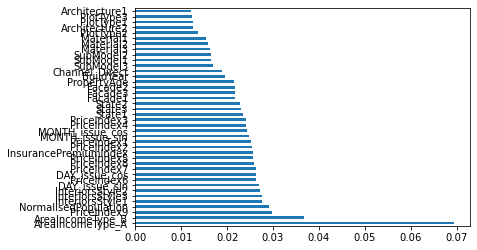

In [75]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='barh')
plt.show()

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
pip install skater

In [ ]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_jobs=-1)

In [ ]:
rf.fit(X,y)

In [ ]:
interpreter = Interpretation(X, feature_names=X.columns)
model = InMemoryModel(rf.predict_proba, examples=X)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending=True)
figure(figsize=(1,1))

In [ ]:
X.columns

In [ ]:
pyint_model = InMemoryModel(rf.predict_proba, examples=X, target_names=['Y_0','Y_1'])
axes_list = interpreter.partial_dependence.plot_partial_dependence(['AreaIncomeType_A'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

In [ ]:
axes_list = interpreter.partial_dependence.plot_partial_dependence(['AreaIncomeType_B'],
                                                                   pyint_model, 
                                                                   grid_resolution=30, 
                                                                   with_variance=True,
                                                                   figsize = (10, 5))

In [ ]:
model = InMemoryModel(rf.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('AreaIncomeType_B', 'AreaIncomeType_A')], model, 
                                                       grid_resolution=10)

In [ ]:
model = InMemoryModel(rf.predict_proba, examples=X, target_names=['Y_0', 'Y_1'])
interpreter.partial_dependence.plot_partial_dependence([('RegionType_A', 'RegionType_B')], model, 
                                                       grid_resolution=10)

In [ ]:
# Model - Randon Forest

In [80]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_dist={'n_estimators':[i for i in range (100,5000,300)],
             'max_features':[i for i in range (2,30,3)],
             'bootstrap':[True,False],
        'class_weight':[None,'balanced'],
       'criterion':['entropy','gini'],
       'max_depth':[i for i in range (2,100,5)],
           'min_samples_leaf':[i for i in range (1,30,2)],
           'min_samples_split':[i for i in range(2,100,3)] 
       }

In [ ]:
clf=RandomForestClassifier(n_jobs=-1,verbose=1)

In [ ]:
random_search=RandomizedSearchCV(clf,cv=5,
                                param_distributions=param_dist,
                                scoring='roc_auc',
                                n_iter=5
                                )

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
rf=random_search.best_estimator_

In [87]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates=np.flatnonzero(results['rank_test_score']==i)
        for candidate in candidates:
            print('Model with rank: {0}'.format(i))
            print('Mean validation score: {0:3f}(std:{1:.5f})'.format(
                results['mean_test_score'][candidate],
                results['std_test_score'][candidate]))
            print('parameters: {0}'.format(results['params'][candidate]))
            print('')

In [ ]:
report(random_search.cv_results_,5)

In [ ]:
rf.fit(x_train,y_train)

In [ ]:
predict_rf=rf.predict_proba(x_test)[:,1]

In [76]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y_test,predict_rf)

In [ ]:
#XGB

In [77]:
from xgboost.sklearn import XGBClassifier

In [82]:
XGB_clf=XGBClassifier()

In [78]:
param_dist={
                'learning_rate':[0.01,0.05,0.1,0.3,0.5],
                'gamma':[i/10.0 for i in range(0,5)],
                'max_depth':[i for i in range(1,100,5)],
                'min_child_weight':[i for i in range(1,10)],
                'max_delta_step':[i for i in range(1,10)],
                'subsample':[i/10.0 for i in range(5,10)],
                'colsample_bytree':[i/10.0 for i in range(5,10)],
                'colsample_bylevel':[i/10.0 for i in range(5,10)],
                'reg_lambda':[1e-5, 1e-2, 0.1, 1, 100],
                'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
                'scale_pos_weight':[i for i in range(1,25)],
                'n_estimators':[i for i in range(100,5000,200)]
            }

In [83]:
random_search=RandomizedSearchCV(XGB_clf,n_jobs=-1,verbose=5,cv=5,n_iter=5,scoring='roc_auc',
                                 param_distributions=param_dist)

In [85]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 32.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 48.7min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'n_estimators': [100, 300, 500, 700,
                                                         900, 1100, 1300, 1500,
                        

In [88]:
report(random_search.cv_results_,5)

Model with rank: 1
Mean validation score: 0.754343(std:0.00424)
parameters: {'subsample': 0.9, 'scale_pos_weight': 18, 'reg_lambda': 0.1, 'reg_alpha': 1, 'n_estimators': 4300, 'min_child_weight': 1, 'max_depth': 1, 'max_delta_step': 4, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}

Model with rank: 2
Mean validation score: 0.744130(std:0.00516)
parameters: {'subsample': 0.9, 'scale_pos_weight': 17, 'reg_lambda': 0.01, 'reg_alpha': 100, 'n_estimators': 1900, 'min_child_weight': 3, 'max_depth': 41, 'max_delta_step': 2, 'learning_rate': 0.3, 'gamma': 0.3, 'colsample_bytree': 0.9, 'colsample_bylevel': 0.8}

Model with rank: 3
Mean validation score: 0.733970(std:0.00639)
parameters: {'subsample': 0.8, 'scale_pos_weight': 15, 'reg_lambda': 100, 'reg_alpha': 0.1, 'n_estimators': 3900, 'min_child_weight': 1, 'max_depth': 76, 'max_delta_step': 9, 'learning_rate': 0.5, 'gamma': 0.2, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.6}

Model with rank: 4
Me

In [89]:
xgb=random_search.best_estimator_

In [90]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=4, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=4300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=0.1, scale_pos_weight=18, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [91]:
predict_xgb=xgb.predict_proba(x_test)[:,1]

In [92]:
roc_auc_score(y_test,predict_xgb)

0.762328458360738

In [95]:
p=xgb.predict_proba(property_test)[:,1]

In [ ]:
predict_xgb

In [ ]:
predict_xgb[1]

In [96]:
submission = pd.DataFrame({'Probablity':p})

#Visualize the first 5 rows
submission.head()

,Probablity
0,0.654856
1,0.606443
2,0.194096
3,0.521944
4,0.787507


In [97]:
submission.to_csv('Jaison_2.csv', index=False)

In [98]:
submission.shape

(10948, 1)

In [ ]:
#NN

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Default parms
parameters={
    'learning_rate':['constant','adaptive','invscaling'],
    'hidden_layer_sizes':[(5,10,15),(20,10),(10,20),(20,30,15),(10,20,10,5)],
    'alpha':[0.3,0.1,0.01],
    'activation':['logistic','relu','tanh']
}

In [ ]:
nn=MLPClassifier()

In [ ]:
random_search=RandomizedSearchCV(nn,n_iter=10,cv=10,param_distributions=parameters,
                                scoring='roc_auc',random_state=2,n_jobs=-1,verbose=1)

In [ ]:
random_search.fit(x_train,y_train)

In [ ]:
report(random_search.cv_results_,5)

In [ ]:
nnt=random_search.best_estimator_

In [ ]:
nnt.fit(x_train,y_train)

In [ ]:
predict_nn=nnt.predict_proba(x_test)[:,1]

In [ ]:
predict_nn

In [ ]:
roc_auc_score(y_test,predict_nn)